In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Importing the csv data

In [2]:
#Reading csv file
data = pd.read_csv("adult.csv")

In [31]:
#getting missing value details
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [22]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
#getting non-standard null values
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Identifying missing values


In [25]:
#getting standard null/Na values
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [3]:
#replacing non-standard null values("?") to standard values(NaN)
data = data.replace('?', np.nan)

In [8]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
#getting count of NaN values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         30725 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        30718 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    31978 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [23]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

## Mean for - Numerical : Mode for - Categorical Missing Values

In [4]:
#Handling missing values
#Replace NaN value with mode for non-numeric columns
#Since Numeric columns do not contain null values it is not handled
col = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex','native.country']
for column in col:
    data[column].fillna(data[column].mode()[0], inplace=True)


In [5]:
col = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']
for column in col:    
    data[column].fillna(data[column].mean(), inplace=True)

In [30]:
#verifying data for missing value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [10]:
col = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex','native.country','income']
for i in col:
    data[i]=data[i].astype('category')
    data[i]=data[i].cat.codes
    print(i,"********",data[i].unique())
    print("__________________________")

workclass ******** [3 6 0 5 4 1 7 2]
__________________________
education ******** [11 15  5  0 10 14  9 12  1  7  8  3  4  2  6 13]
__________________________
marital.status ******** [6 0 5 4 2 3 1]
__________________________
occupation ******** [ 9  3  6  7  0  2 13  5 11  4 12 10  1  8]
__________________________
relationship ******** [1 4 3 2 0 5]
__________________________
race ******** [4 2 1 3 0]
__________________________
sex ******** [0 1]
__________________________
native.country ******** [38 25 11 39  2 35 18 29 37  1 34 14 32 30 19  8 10 21 23 16 15  4 20  0
 28 26  5 13  7 17  3 12 22  6  9 40 33 31 24 36 27]
__________________________
income ******** [0 1]
__________________________


## Extract X and Y

In [13]:
x_data = data.iloc[:,0:14]
y_data = data.iloc[:,14:15]

In [14]:
x_data.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,77053,11,9,6,9,1,4,0,0,4356,40,38
1,82,3,132870,11,9,6,3,1,4,0,0,4356,18,38
2,66,3,186061,15,10,6,9,4,2,0,0,4356,40,38


In [15]:
y_data.head(3)

,income
0,0
1,0
2,0


## Splitting Training and Test Data

In [123]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(x_data, y_data, test_size=0.2,random_state = 100)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(26048, 14) (26048, 1)
(6513, 14) (6513, 1)


# Classifier Modelling

In [47]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

### GaussianNB

In [63]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train,Y_train.values.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
Y_pred=model.predict(X_test)

### GaussianNB Accuracy Score = 0.7927222478120681

In [66]:
results = confusion_matrix(Y_test, Y_pred) 
print("*****************")
print('Confusion Matrix ')
print("*****************")
print(results)
print("*****************")
print("*****************")
print('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print('Report : ',classification_report(Y_test, Y_pred))  

*****************
Confusion Matrix 
*****************
[[4665  255]
 [1095  498]]
*****************
*****************
Accuracy Score : 0.7927222478120681
Report :                precision    recall  f1-score   support

           0       0.81      0.95      0.87      4920
           1       0.66      0.31      0.42      1593

   micro avg       0.79      0.79      0.79      6513
   macro avg       0.74      0.63      0.65      6513
weighted avg       0.77      0.79      0.76      6513



### Decision Boundary

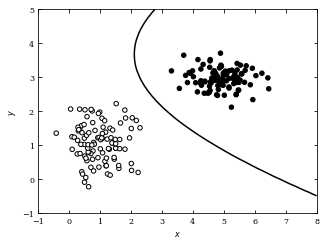

In [107]:
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## BernoulliNB

In [67]:
from sklearn.naive_bayes import BernoulliNB

gnb_model = BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)
gnb_model.fit(X_train, Y_train.values.ravel())

BernoulliNB(alpha=1.0, binarize=None, class_prior=None, fit_prior=True)

In [68]:
Y_pred=gnb_model.predict(X_test)

/Users/srajathii/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:948: RuntimeWarning: invalid value encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [69]:
results = confusion_matrix(Y_test, Y_pred) 
print("*****************")
print('Confusion Matrix ')
print("*****************")
print(results)
print("*****************")
print("*****************")
print('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print('Report : ',classification_report(Y_test, Y_pred))  

*****************
Confusion Matrix 
*****************
[[4920    0]
 [1593    0]]
*****************
*****************
Accuracy Score : 0.7554122524182404
Report :                precision    recall  f1-score   support

           0       0.76      1.00      0.86      4920
           1       0.00      0.00      0.00      1593

   micro avg       0.76      0.76      0.76      6513
   macro avg       0.38      0.50      0.43      6513
weighted avg       0.57      0.76      0.65      6513



/Users/srajathii/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### BernoulliNB Accuracy Score = 0.7554122524182404

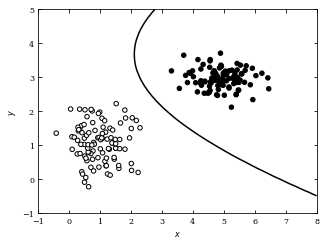

In [106]:
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## MultinomialNB

In [70]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, Y_train.values.ravel())
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
Y_pred=mnb.predict(X_test)

In [72]:
results = confusion_matrix(Y_test, Y_pred) 
print("*****************")
print('Confusion Matrix ')
print("*****************")
print(results)
print("*****************")
print("*****************")
print('Accuracy Score :',accuracy_score(Y_test, Y_pred))
print('Report : ',classification_report(Y_test, Y_pred))  

*****************
Confusion Matrix 
*****************
[[4725  195]
 [1199  394]]
*****************
*****************
Accuracy Score : 0.7859665284814985
Report :                precision    recall  f1-score   support

           0       0.80      0.96      0.87      4920
           1       0.67      0.25      0.36      1593

   micro avg       0.79      0.79      0.79      6513
   macro avg       0.73      0.60      0.62      6513
weighted avg       0.77      0.79      0.75      6513



### MultinomialNB Accuracy Score = 0.7859665284814985

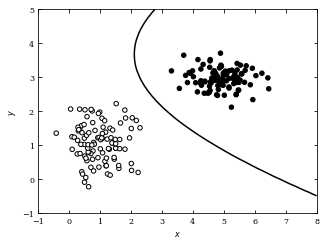

In [103]:
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Y_test, Y_pred, edgecolors=(0, 0, 0))
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## Creating an output .csv

In [134]:
Y_test.columns=['income_actual']
Y_pred = pd.DataFrame(data = Y_pred, columns=['income_predict']) 

In [136]:
data = pd.concat([Y_test, Y_pred], axis=1)
data.to_csv('output.csv', header=False, index=False) 